# Interpolating numpy arrays

In [1]:
from earthkit.regrid import interpolate
from earthkit.data import from_source

Get GRIB data on an octahedral reduced Gaussian global grid:

In [2]:
ds = from_source("url", 
                 "https://sites.ecmwf.int/repository/earthkit-regrid/examples/O32_multi.grib2")

O32_multi.grib2:   0%|          | 0.00/31.4k [00:00<?, ?B/s]

In [3]:
res = interpolate(ds[0].values, {"grid": "O32"}, {"grid": [1,1]}) 
res.shape

/var/folders/93/w0p869rx17q98wxk83gn9ys40000gn/T/ipykernel_42733/1412418366.py:1: DeprecatedWarning: interpolate is deprecated as of 0.5.0. Use regrid() instead
  res = interpolate(ds[0].values, {"grid": "O32"}, {"grid": [1,1]})


(181, 360)

Define some helper methods for plotting.

In [4]:
def make_lat_lon(dx):
    import numpy as np
    
    lat_v = np.linspace(90, -90, int(180/dx)+1)
    lon_v = np.linspace(0, 360-dx, int(360/dx))
    lon, lat = np.meshgrid(lon_v, lat_v)
    return lat, lon

def make_plot(r, dx):
    import matplotlib.pyplot as plt
    
    lat, lon = make_lat_lon(dx)

    print(r.size)
    # print(lat.size)
    # print(lon.size)
    v = r - 273.16
    
    fig, ax = plt.subplots()
    tcf = ax.tricontourf(lon.flatten(), lat.flatten(), v.flatten(), vmin=-20, vmax=36, levels=56, cmap="plasma")
    fig.colorbar(tcf)
    plt.show()

Plot the resulting data.

65160


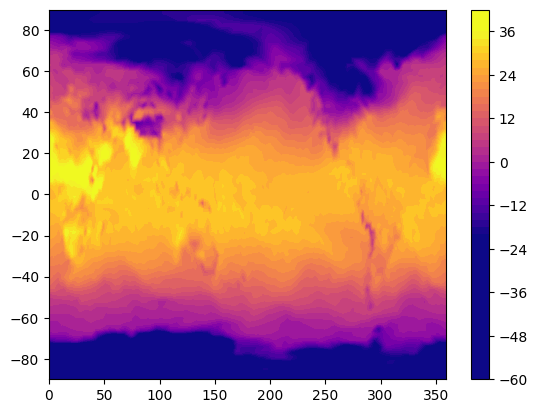

In [5]:
make_plot(res, 1)